## 1. Requeriments

In [43]:
# import torch
# print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cpu.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

## 2. Import libraries

In [44]:
import torch
from torch_geometric.data import Data
import networkx as nx
import numpy as np
import pandas as pd
from sklearn import preprocessing
import random
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from torch_geometric.loader import DataLoader

## 3. Graph building

### 3.1. Gene matrix

In [45]:
genes = pd.read_csv('C:/Users/sandr/Documents/ART_project/GNN model/Data/PPT-Ohmnet/mRCC_big_pool/Second big pool/mrcc_protein_matrix_total_RNA_nodes.csv')
Y = genes.Y

genes = genes.iloc[:,1:3188] 
genes

,A1CF,A4GALT,AAAS,AADAT,AAMP,ABCA1,ABCA2,ABCA7,ABCB1,ABCB6,...,ZMPSTE24,ZNF106,ZNF24,ZNF274,ZNF473,ZNF513,ZRANB1,ZRSR2,ZW10,ZWINT
0,33.643965,33.279532,34.479355,31.093560,34.740118,35.452910,34.080431,33.456188,36.716012,33.867624,...,32.22373,34.12471,32.12065,30.73579,29.56513,33.18436,31.24377,33.55092,31.66007,30.04056
1,28.866645,33.019435,34.074284,30.162233,34.265360,34.490012,34.191456,32.075265,34.174577,32.703008,...,32.19111,34.06288,32.43414,31.30495,30.12425,31.55522,31.86911,34.40793,31.68666,29.94062
2,26.684228,31.033210,33.878221,31.323227,34.708417,36.122945,33.077576,33.196599,31.225510,34.522351,...,32.77568,36.59738,32.53318,31.43622,30.34865,31.99790,32.58640,34.19171,31.38916,31.95812
3,32.521495,33.009203,34.196192,30.243072,35.123918,34.631350,32.862723,30.327194,32.988641,33.059035,...,32.46805,34.27609,33.50006,30.39592,30.97037,32.64170,32.44003,33.54101,31.71354,30.71732
4,23.219176,31.447751,34.867916,30.632459,33.197341,34.885088,33.046511,32.147897,33.284849,31.488348,...,31.64157,36.30242,32.41124,31.68776,31.55637,34.70525,31.95751,32.64282,33.38645,30.75149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,26.161567,32.365074,34.742167,31.307773,33.113039,33.747546,33.931629,31.740490,33.838323,32.296025,...,32.02075,34.82837,33.17326,31.86836,31.17820,33.59099,32.57067,33.63338,31.81453,30.78532
177,26.161567,30.121368,33.792409,31.192059,34.450999,34.371220,31.799811,30.626834,31.895951,33.784466,...,32.16958,33.61960,31.56047,31.59540,29.23127,32.77207,30.78896,31.31709,30.65842,31.50200
178,31.822942,31.953984,34.146861,30.360677,33.676334,35.386781,32.611501,31.681398,33.842290,32.838072,...,32.62316,35.20787,32.46942,31.20456,30.95466,32.07850,31.45327,34.13179,32.56414,30.91066
179,32.930512,33.255145,35.138362,30.881980,33.808583,36.072286,34.598098,32.909022,34.715293,32.561403,...,31.49508,34.76557,32.63131,32.87016,31.17809,33.03248,31.54103,33.80478,30.91711,28.76312


In [46]:
scaler = preprocessing.MinMaxScaler()
names = genes.columns
d = scaler.fit_transform(genes)
genes = pd.DataFrame(d, columns=names)
genes

,A1CF,A4GALT,AAAS,AADAT,AAMP,ABCA1,ABCA2,ABCA7,ABCB1,ABCB6,...,ZMPSTE24,ZNF106,ZNF24,ZNF274,ZNF473,ZNF513,ZRANB1,ZRSR2,ZW10,ZWINT
0,0.845335,0.649994,0.561587,0.845382,0.653407,0.725634,0.563173,0.874550,0.913055,0.671207,...,0.527435,0.426953,0.270376,0.234004,0.606001,0.607362,0.137365,0.530862,0.572566,0.707656
1,0.528869,0.611402,0.433718,0.759865,0.564839,0.444908,0.586608,0.596735,0.611207,0.444017,...,0.520119,0.412624,0.363550,0.379268,0.668237,0.356705,0.304874,0.680442,0.579149,0.698606
2,0.384299,0.316698,0.371827,0.866471,0.647493,0.920977,0.351490,0.822326,0.260945,0.798929,...,0.651230,1.000000,0.392987,0.412771,0.693215,0.424816,0.497013,0.642703,0.505492,0.881304
3,0.770979,0.609884,0.472201,0.767288,0.725006,0.486115,0.306139,0.245058,0.470353,0.513469,...,0.582232,0.462035,0.680360,0.147260,0.762420,0.523870,0.457805,0.529132,0.585805,0.768942
4,0.154762,0.378205,0.684244,0.803043,0.365597,0.560090,0.344933,0.611347,0.505534,0.207065,...,0.396864,0.931642,0.356744,0.476971,0.827648,0.841364,0.328554,0.372364,1.000000,0.772036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.349676,0.514312,0.644549,0.865052,0.349870,0.228449,0.531764,0.529385,0.571270,0.364624,...,0.481909,0.590028,0.583230,0.523065,0.785553,0.669926,0.492800,0.545254,0.610809,0.775099
177,0.349676,0.181405,0.344739,0.854427,0.599471,0.410276,0.081779,0.305339,0.340574,0.654984,...,0.515290,0.309892,0.103880,0.453398,0.568838,0.543928,0.015536,0.140975,0.324568,0.840000
178,0.724704,0.453317,0.456628,0.778087,0.454955,0.706354,0.253111,0.517497,0.571741,0.470365,...,0.617022,0.677978,0.374036,0.353646,0.760671,0.437217,0.193484,0.632245,0.796405,0.786450
179,0.798074,0.646375,0.769616,0.825954,0.479626,0.906207,0.672443,0.764471,0.675428,0.416393,...,0.364008,0.575474,0.422153,0.778750,0.785541,0.583994,0.216992,0.575170,0.388617,0.591975


In [47]:
train_genes, test_genes, Y_train, Y_test = train_test_split(genes, Y, test_size=0.1, stratify=Y)

### 3.2. Graph edges

In [48]:
path ='C:/Users/sandr/Documents/ART_project/GNN model/Data/PPT-Ohmnet/mRCC_big_pool/Second big pool/network_edges_mrcc_total_RNA_nodes.tsv'
data = pd.read_csv(path, delimiter='\t')
edge_index1=data[data.columns[1]].to_numpy()
edge_index2=data[data.columns[2]].to_numpy()

In [49]:
edge_index = np.concatenate((edge_index1, edge_index2))

In [50]:
edge_index

array(['NFKB1', 'NFKB1', 'NFKB1', ..., 'ZFY', 'DMBT1', 'TNIP2'],
      dtype=object)

In [51]:
le = preprocessing.LabelEncoder()
le.fit(edge_index)
len(list(le.classes_))

3187

In [52]:
edge_index1 = le.transform(edge_index1)
edge_index2 = le.transform(edge_index2)

In [53]:
edge_index = [edge_index1]+[edge_index2]
edge_index = np.array(edge_index)

In [54]:
edge_index

array([[1741, 1741, 1741, ..., 1337, 2448, 1741],
       [ 541,  714, 1512, ..., 3169,  711, 2858]])

In [55]:
edge_index = torch.tensor(edge_index, dtype=torch.int64)
edge_index

tensor([[1741, 1741, 1741,  ..., 1337, 2448, 1741],
        [ 541,  714, 1512,  ..., 3169,  711, 2858]])

### 3.3. Create dataset

In [56]:
train_data=[]
for g in range(len(train_genes)):
  b=[]
  for i in train_genes.iloc[g].to_numpy():
    a=[]
    # a.append(Y[g])
    # a.append(i*100)
    a.append(i)
    b.append(a)
  x = torch.tensor([b], dtype=torch.float).reshape([-1,1])
  edge_index = edge_index
  y = torch.tensor([Y_train.iloc[g]], dtype=torch.long).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  train_data.append(data)

print(len(train_data))

162


In [57]:
test_data=[]
for g in range(len(test_genes)):
  b=[]
  for i in test_genes.iloc[g].to_numpy():
    a=[]
    # a.append(Y[g])
    # a.append(i*100)
    a.append(i)
    b.append(a)
  x = torch.tensor([b], dtype=torch.float).reshape([-1,1])
  edge_index = edge_index
  y = torch.tensor([Y_test.iloc[g]], dtype=torch.long).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  test_data.append(data)

print(len(test_data))

19


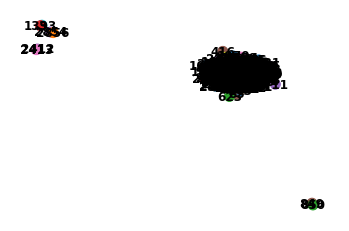

In [58]:
def plot_graph(data,description=True):
    edges_raw = data.edge_index.numpy()
    edges = [(x, y) for x, y in zip(edges_raw[0, :], edges_raw[1, :])]
    labels = data.x.numpy()
    G = nx.Graph()
    G.add_nodes_from(list(range(np.max(edges_raw))))
    G.add_edges_from(edges)
    plt.subplot(111)
    options = {
       'node_size': 100,
       'width': 1,
    }
    nx.draw(G, with_labels=description, node_color=labels.tolist(), cmap=plt.cm.tab10, font_weight='bold', **options)
    plt.show()

plot_graph(data,True)

### 3.4. Patient sample

In [59]:
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of charcateristics per node: {data.num_features}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')
print(f'Number of node features: {data.num_node_features}')


Number of nodes: 3187
Number of charcateristics per node: 1
Number of edges: 47649
Average node degree: 14.95
Has isolated nodes: False
Has self-loops: False
Is undirected: False
Number of node features: 1


## 4. Graph training

### 4.2. Training and testing the model

In [60]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GraphConv
from torch_geometric.nn import SAGPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
from torch import nn

In [61]:
# import torch
# import torch.nn.functional as F
# from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
# from torch_geometric.nn import GCNConv, GINConv
# from torch_geometric.nn import global_mean_pool, global_add_pool
# embed_dim = 32

# class Net(torch.nn.Module):
#     def __init__(self, dim_h):
#         super(Net, self).__init__()
#         self.conv1 = GCNConv(1, dim_h)
#         self.conv2 = GCNConv(dim_h, dim_h)
#         self.conv3 = GCNConv(dim_h, dim_h)
#         self.lin = Linear(dim_h, 1)

#     def forward(self, x, edge_index, batch):
#         # Node embeddings 
#         h = self.conv1(x, edge_index)
#         h = h.relu()
#         h = self.conv2(h, edge_index)
#         h = h.relu()
#         h = self.conv3(h, edge_index)

#         # Graph-level readout
#         hG = global_mean_pool(h, batch)

#         # Classifier
#         h = F.dropout(hG, p=0.5, training=self.training)
#         h = self.lin(h)
        
#         return F.sigmoid(h).squeeze(1)


In [62]:
import torch
import torch.nn.functional as F
from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
from torch_geometric.nn import GCNConv, GINConv
from torch_geometric.nn import global_mean_pool, global_add_pool
embed_dim = 32

class GIN(torch.nn.Module):
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(1, dim_h),
                       BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.lin1 = Linear(dim_h*3, dim_h*3)
        self.lin2 = Linear(dim_h*3, 2)

    def forward(self, x, edge_index, batch):
        # Node embeddings 
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        h = torch.cat((h1, h2, h3), dim=1)

        # Classifier
        h = self.lin1(h)
        h = h.relu()
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)
        
        return F.log_softmax(h, dim=1)

In [63]:
def train(model, train_loader, optimizer, criterion):
    total_loss = 0
    acc = 0
    for data in train_loader:
        optimizer.zero_grad()
        output = model(data.x, data.edge_index, data.batch)
        loss = criterion(output, data.y.squeeze(1))  
        total_loss += loss / len(train_loader)
        acc += accuracy(output.argmax(dim=1), data.y.squeeze(1)) / len(train_loader)
        loss.backward()
        optimizer.step()
        # loss_all += loss.item() * data.num_graphs
    return total_loss, acc

    
@torch.no_grad()
def validation(model, val_loader, criterion):
    model.eval()
    acc = 0
    loss = 0
    for data in val_loader:
        output = model(data.x, data.edge_index, data.batch)
        loss += criterion(output, data.y.squeeze(1))/ len(val_loader)
        acc += accuracy(output.argmax(dim=1), data.y.squeeze(1)) / len(val_loader)
    return loss, acc 

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

def test(model, test_data):
    acc = 0
    test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
    for data in test_loader:
        output = model(data.x, data.edge_index, data.batch)
        acc += accuracy(output.argmax(dim=1), data.y.squeeze(1)) / len(test_loader)
    return acc


In [64]:
from sklearn.model_selection import StratifiedKFold # import KFold
kf=StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

TRAIN:  [ 15  17  18  19  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 20]
145
17
Epoch: 000, Loss: 86.8472, Train Acc: 0.4934, Loss: 76.2830, Test Acc: 0.5294
Epoch: 001, Loss: 60.0441, Train Acc: 0.4699, Loss: 46.4057, Test Acc: 0.5294
Epoch: 002, Loss: 53.9226, Train Acc: 0.4761, Loss: 36.0506, Test Acc: 0.4706
Epoch: 003, Loss: 32.4937, Train Acc: 0.5364, Loss: 43.9457, Test Acc: 0.4706
Epoch: 004, Loss: 38.686

No handles with labels found to put in legend.


GIN accuracy: 0.5263158082962036
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  20  32
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161] TEST: [15 17 18 19 21 22 23 24 25 26 27 28 29 30 31 33 34]
145
17
Epoch: 000, Loss: 76.6876, Train Acc: 0.4989, Loss: 146.3796, Test Acc: 0.4706
Epoch: 001, Loss: 97.8553, Train Acc: 0.4886, Loss: 13.0397, Test Acc: 0.4706
Epoch: 002, Loss: 77.1005, Train Acc: 0.5426, Loss: 12.3024, Test Acc: 0.4706
Epoch: 003, Loss: 23.5449, Train Acc: 0.5114, Loss: 12.9283, Test Ac

No handles with labels found to put in legend.


GIN accuracy: 0.5789473652839661
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  33  34  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161] TEST: [32 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
146
16
Epoch: 000, Loss: 61.7235, Train Acc: 0.5069, Loss: 193.2167, Test Acc: 0.5000
Epoch: 001, Loss: 110.4562, Train Acc: 0.5361, Loss: 16.5311, Test Acc: 0.5625
Epoch: 002, Loss: 16.1089, Train Acc: 0.5111, Loss: 8.4612, Test Acc: 0.5625
Epoch: 003, Loss: 6.3738, Train Acc: 0.5660, Loss: 7.7436, Test Acc

No handles with labels found to put in legend.


GIN accuracy: 0.5263158082962036
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  65  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161] TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 66]
146
16
Epoch: 000, Loss: 55.5664, Train Acc: 0.5674, Loss: 221.6406, Test Acc: 0.5000
Epoch: 001, Loss: 94.2470, Train Acc: 0.5139, Loss: 59.9668, Test Acc: 0.5000
Epoch: 002, Loss: 39.7393, Train Acc: 0.4889, Loss: 76.6473, Test Acc: 0.5000
Epoch: 003, Loss: 59.1146, Train Acc: 0.4889, Loss: 32.5854, Test A

No handles with labels found to put in legend.


GIN accuracy: 0.3684210479259491
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  66  76  79  82  83  84  85
  86  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161] TEST: [65 67 68 69 70 71 72 73 74 75 77 78 80 81 87 88]
146
16
Epoch: 000, Loss: 104.4081, Train Acc: 0.4729, Loss: 55.9314, Test Acc: 0.5000
Epoch: 001, Loss: 49.7789, Train Acc: 0.5361, Loss: 7.3782, Test Acc: 0.5000
Epoch: 002, Loss: 16.4063, Train Acc: 0.4917, Loss: 31.3369, Test Acc: 0.5000
Epoch: 003, Loss: 16.5975, Train Acc: 0.5236, Loss: 24.1536, Test Ac

No handles with labels found to put in legend.


GIN accuracy: 0.5789473652839661
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  77  78  80  81  87  88  94  95  96  98 101 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161] TEST: [ 76  79  82  83  84  85  86  89  90  91  92  93  97  99 100 102]
146
16
Epoch: 000, Loss: 60.3533, Train Acc: 0.5687, Loss: 334.6794, Test Acc: 0.5000
Epoch: 001, Loss: 119.7666, Train Acc: 0.5111, Loss: 49.3354, Test Acc: 0.5000
Epoch: 002, Loss: 37.3890, Train Acc: 0.5361, Loss: 23.1589, Test Acc: 0.5000
Epoch: 003, Loss: 40.9065, Train Acc: 0.5000, Loss

No handles with labels found to put in legend.


GIN accuracy: 0.5263158082962036
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  97  99 100 102 113 114 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161] TEST: [ 94  95  96  98 101 103 104 105 106 107 108 109 110 111 112 115]
146
16
Epoch: 000, Loss: 76.6160, Train Acc: 0.4403, Loss: 187.8840, Test Acc: 0.5625
Epoch: 001, Loss: 66.0682, Train Acc: 0.5174, Loss: 76.1357, Test Acc: 0.4375
Epoch: 002, Loss: 51.4736, Train Acc: 0.5049, Loss: 93.7247, Test Acc: 0.4375
Epoch: 003, Loss: 55.3457, Train Acc: 0.5049, Loss:

No handles with labels found to put in legend.


GIN accuracy: 0.5263158082962036
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 115 127 128 130 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161] TEST: [113 114 116 117 118 119 120 121 122 123 124 125 126 129 131 132]
146
16
Epoch: 000, Loss: 45.0616, Train Acc: 0.5521, Loss: 219.3397, Test Acc: 0.4375
Epoch: 001, Loss: 124.8127, Train Acc: 0.5049, Loss: 23.8329, Test Acc: 0.5625
Epoch: 002, Loss: 67.5867, Train Acc: 0.5236, Loss: 52.9318, Test Acc: 0.5625
Epoch: 003, Loss: 32.7604, Train Acc: 0.4951, Loss

No handles with labels found to put in legend.


GIN accuracy: 0.5263158082962036
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 129 131 132 145 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161] TEST: [127 128 130 133 134 135 136 137 138 139 140 141 142 143 144 146]
146
16
Epoch: 000, Loss: 80.1476, Train Acc: 0.5549, Loss: 85.8511, Test Acc: 0.5625
Epoch: 001, Loss: 33.7405, Train Acc: 0.5250, Loss: 27.9326, Test Acc: 0.4375
Epoch: 002, Loss: 14.8229, Train Acc: 0.4875, Loss: 13.1761, Test Acc: 0.4375
Epoch: 003, Loss: 27.7871, Train Acc: 0.5062, Loss: 

No handles with labels found to put in legend.


GIN accuracy: 0.4736842215061188
TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 146] TEST: [145 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161]
146
16
Epoch: 000, Loss: 95.8048, Train Acc: 0.5049, Loss: 13.2716, Test Acc: 0.4375
Epoch: 001, Loss: 109.9181, Train Acc: 0.5174, Loss: 221.9301, Test Acc: 0.4375
Epoch: 002, Loss: 140.9634, Train Acc: 0.4701, Loss: 160.2074, Test Acc: 0.5625
Epoch: 003, Loss: 90.0237, Train Acc: 0.5299, Lo

No handles with labels found to put in legend.


GIN accuracy: 0.42105263471603394
Val accuracy: 0.5058823585510254
Test accuracy: 0.5052631676197052
Val stv: 0.0412420727957663
Test stv: 0.06315789719422732


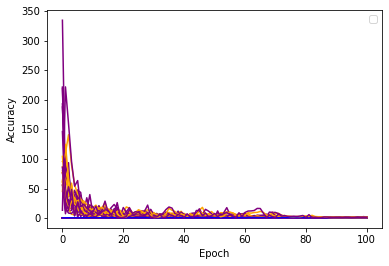

In [65]:
val_avg = []
test_avg = []
for train_index, val_index in kf.split(train_data, Y_train):
    train_dataset=[]
    val_dataset=[]
    print("TRAIN: ", train_index, "TEST:", val_index)
    for i in train_index:
        train_dataset.append(train_data[i])
    for i in val_index:
        val_dataset.append(train_data[i])

    print(len(train_dataset))
    print(len(val_dataset))

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    model = GIN(dim_h=32)
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.6)
    # optimizer = torch.optim.Adadelta(model.parameters(), lr=0.7)
    train_epoch=[]
    val_epoch=[]
    train_loss_=[]
    val_loss_=[]
    epochs = 100
    train_acc=0
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs+1):
        train_loss, train_acc = train(model, train_loader, optimizer, criterion)
        val_loss, val_acc = validation(model, val_loader, criterion)

        train_loss = train_loss.detach().numpy()
        train_loss_.append(train_loss)
        val_loss_.append(val_loss.detach().numpy())
        train_epoch.append(train_acc)
        val_epoch.append(val_acc)
        
        print(f'Epoch: {epoch:03d}, Loss: {train_loss:.4f}, '
            f'Train Acc: {train_acc:.4f}, Loss: {val_loss:.4f}, Test Acc: {val_acc:.4f}')

    test_acc = test(model, test_data)
    print("GIN accuracy: " + str(test_acc))

    plt.plot(train_epoch, color="red")
    plt.plot(val_epoch, color="blue")
    plt.plot(train_loss_, color="orange")
    plt.plot(val_loss_, color="purple")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    val_avg.append(val_acc)
    test_avg.append(test_acc)

print('Val accuracy: '+ str(np.array(val_avg).mean()))
print('Test accuracy: '+ str(np.array(test_avg).mean()))

print('Val stv: '+ str(np.array(val_avg).std()))
print('Test stv: '+ str(np.array(test_avg).std()))